In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
test=pd.read_csv('/content/test.csv')
test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24
...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48
40745,4185,Wattala,3191.92,3004.16,3098.04
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees
40747,11874,Wattala,4313.76,4183.04,4313.76


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
for column in test.columns:
    unique_count = test[column].nunique()
    print(f"Total unique values in '{column}' column: {unique_count}")


Total unique values in 'Customer_ID' column: 40749
Total unique values in 'outlet_city' column: 27
Total unique values in 'luxury_sales' column: 33183
Total unique values in 'fresh_sales' column: 36100
Total unique values in 'dry_sales' column: 35771


In [ ]:
for column in test.columns:
  print(f"Unique values in '{column}' column:")
  print(test[column].unique())
  print("\n")


Unique values in 'Customer_ID' column:
[33574 10089 38329 ... 28664 11874 11431]


Unique values in 'outlet_city' column:
['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']


Unique values in 'luxury_sales' column:
['2686.5' '1717.56' '854.04' ... '3838.6' '4313.76' '4212.16']


Unique values in 'fresh_sales' column:
['3582' '2576.34' '1242.24' ... '3951.5' '4183.04' '4212.16']


Unique values in 'dry_sales' column:
['12537' '9446.58' '5201.88' ... '3098.04'
 'Three Thousand seven hundread ruppees' '4313.76']




In [ ]:
test['luxury_sales'] = test['luxury_sales'].astype(str).str.strip()
test['fresh_sales'] = test['fresh_sales'].astype(str).str.strip()
test['dry_sales'] = test['dry_sales'].astype(str).str.strip()

In [ ]:
import re
string_luxury_sales=test['luxury_sales'][test['luxury_sales'].apply(lambda x:bool(re.match(r'[a-zA-Z]',str(x))))]
string_luxury_sales.value_counts()

,count
luxury_sales,
Seven Hundread and sixty Ruppees,1
Eight Hundread and fifteen ruppes,1


In [ ]:
# Manually replace specific values
test['luxury_sales'] = test['luxury_sales'].replace({
    'Seven Hundread and sixty Ruppees': '760',
    'Eight Hundread and fifteen ruppes': '815',
})


# Print the cleaned unique values
print(test['luxury_sales'].unique())

['2686.5' '1717.56' '854.04' ... '3838.6' '4313.76' '4212.16']


In [ ]:
string_fresh_sales=test['fresh_sales'][test['fresh_sales'].apply(lambda x:bool(re.match(r'[a-zA-Z]',str(x))))]
string_fresh_sales.value_counts()

,count
fresh_sales,
Nine thousand ruppess,1


In [ ]:
# Manually replace specific values
test['fresh_sales'] = test['fresh_sales'].replace({
    'Nine thousand ruppess': '9000'
})


# Print the cleaned unique values
print(test['fresh_sales'].unique())

['3582' '2576.34' '1242.24' ... '3951.5' '4183.04' '4212.16']


In [ ]:
string_dry_sales=test['dry_sales'][test['dry_sales'].apply(lambda x:bool(re.match(r'[a-zA-Z]',str(x))))]
string_dry_sales.value_counts()

,count
dry_sales,
Three Thousand seven hundread ruppees,1


In [ ]:
# Manually replace specific values
test['dry_sales'] = test['dry_sales'].replace({
    'Three Thousand seven hundread ruppees': '3700'
})


# Print the cleaned unique values
print(test['dry_sales'].unique())

['12537' '9446.58' '5201.88' ... '3098.04' '3700' '4313.76']


In [ ]:
test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'], errors='coerce').astype('float')
test['luxury_sales'].dtypes

dtype('float64')

In [ ]:
test['dry_sales'] = pd.to_numeric(test['dry_sales'], errors='coerce').astype('float')
test['dry_sales'].dtypes

dtype('float64')

In [ ]:
test['fresh_sales']= pd.to_numeric(test['fresh_sales'],errors='coerce').astype('float')
test['fresh_sales'].dtypes

dtype('float64')

In [ ]:
# Manually replace specific values
test['outlet_city'] = test['outlet_city'].replace({
    'batticaloa': 'Batticaloa',
    'kalmunai': 'Kalmunai',
    'MoraTuwa': 'Moratuwa',
    'PeliyagodA': 'Peliyagoda',
    'Trincomale': 'Trincomalee'
})


# Print the cleaned unique values
print(test['outlet_city'].unique())


['Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia' 'Anuradhapura' 'Galle'
 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela' 'Kalmunai' 'Kandy' 'Katunayake'
 'Kelaniya' 'Madawachiya' 'Kotte' 'Moratuwa' 'Negombo' 'Nuwara Eliya'
 'Panadura' 'Peliyagoda' 'Trincomalee' 'Wattala']


In [ ]:
test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_ID   40749 non-null  int64  
 1   outlet_city   40749 non-null  object 
 2   luxury_sales  40749 non-null  float64
 3   fresh_sales   40749 non-null  float64
 4   dry_sales     40749 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


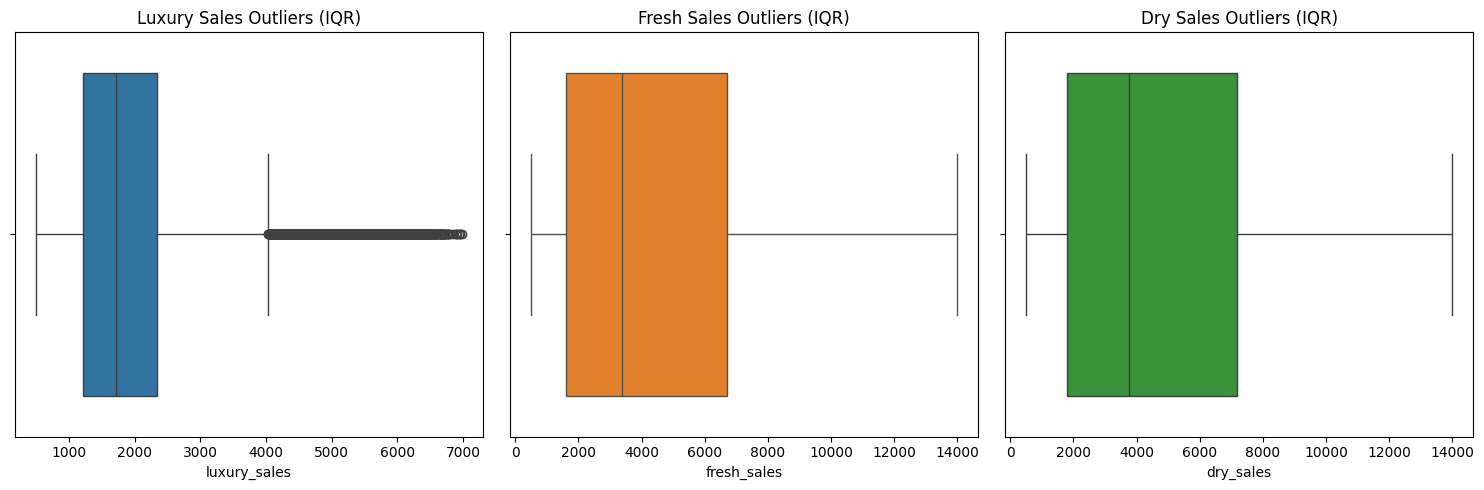

In [ ]:
# Calculate IQR for each sales column and detect outliers
def detect_outliers_iqr(test, column):
    Q1 = test[column].quantile(0.25)
    Q3 = test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (test[column] < lower_bound) | (test[column] > upper_bound)
    return outliers

# Create outlier detection using IQR for each sales column
test['outliers_luxury'] = detect_outliers_iqr(test, 'luxury_sales')
test['outliers_fresh'] = detect_outliers_iqr(test, 'fresh_sales')
test['outliers_dry'] = detect_outliers_iqr(test, 'dry_sales')

# Plotting separate box plots for each sales column
plt.figure(figsize=(15, 5))

# Luxury Sales Boxplot with custom color
plt.subplot(1, 3, 1)
sns.boxplot(x=test['luxury_sales'], color='#1f77b4')  # Blue color
plt.title('Luxury Sales Outliers (IQR)')

# Fresh Sales Boxplot with custom color
plt.subplot(1, 3, 2)
sns.boxplot(x=test['fresh_sales'], color='#ff7f0e')  # Orange color
plt.title('Fresh Sales Outliers (IQR)')

# Dry Sales Boxplot with custom color
plt.subplot(1, 3, 3)
sns.boxplot(x=test['dry_sales'], color='#2ca02c')  # Green color
plt.title('Dry Sales Outliers (IQR)')

plt.tight_layout()
plt.show()


In [ ]:
test[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]] = test[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]].replace({True: 1, False: 0})

<ipython-input-22-9b189f25b56a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]] = test[["outliers_luxury" , "outliers_fresh" , "outliers_dry"]].replace({True: 1, False: 0})


In [ ]:
test.drop_duplicates(inplace=True)

In [ ]:
from sklearn import preprocessing

# Define the union list of cities (all cities across both datasets)
outlet_city_list = ['Batticaloa', 'Colombo', 'Dehiwala-Mount Lavinia', 'Anuradhapura', 'Galle',
                   'Gampaha', 'Homagama', 'Jaffna', 'Kaduwela', 'Kalmunai', 'Kandy', 'Katunayake',
                   'Kelaniya', 'Madawachiya', 'Kotte', 'Moratuwa', 'Negombo', 'Nuwara Eliya',
                   'Panadura', 'Peliyagoda', 'Trincomalee', 'Wattala']

label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(outlet_city_list)
test['outlet_city_encoded'] = label_encoder.transform(test['outlet_city'])

print(test.head())




   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0        33574  Batticaloa       2686.50      3582.00   12537.00   
1        10089  Batticaloa       1717.56      2576.34    9446.58   
2        38329  Batticaloa        854.04      1242.24    5201.88   
3        11376  Batticaloa       1638.12      2320.67    9282.68   
4        12410  Batticaloa       1039.09      1518.67    5435.24   

   outliers_luxury  outliers_fresh  outliers_dry  outlet_city_encoded  
0                0               0             0                    1  
1                0               0             0                    1  
2                0               0             0                    1  
3                0               0             0                    1  
4                0               0             0                    1  


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          40749 non-null  int64  
 1   outlet_city          40749 non-null  object 
 2   luxury_sales         40749 non-null  float64
 3   fresh_sales          40749 non-null  float64
 4   dry_sales            40749 non-null  float64
 5   outliers_luxury      40749 non-null  int64  
 6   outliers_fresh       40749 non-null  int64  
 7   outliers_dry         40749 non-null  int64  
 8   outlet_city_encoded  40749 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.8+ MB


In [ ]:
test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,outliers_luxury,outliers_fresh,outliers_dry,outlet_city_encoded
0,33574,Batticaloa,2686.50,3582.00,12537.00,0,0,0,1
1,10089,Batticaloa,1717.56,2576.34,9446.58,0,0,0,1
2,38329,Batticaloa,854.04,1242.24,5201.88,0,0,0,1
3,11376,Batticaloa,1638.12,2320.67,9282.68,0,0,0,1
4,12410,Batticaloa,1039.09,1518.67,5435.24,0,0,0,1
...,...,...,...,...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48,0,0,0,21
40745,4185,Wattala,3191.92,3004.16,3098.04,0,0,0,21
40746,28664,Wattala,3838.60,3951.50,3700.00,0,0,0,21
40747,11874,Wattala,4313.76,4183.04,4313.76,1,0,0,21


In [ ]:
test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
outliers_luxury,0
outliers_fresh,0
outliers_dry,0
outlet_city_encoded,0


In [ ]:
test.to_csv('prepocessed_test_dataset.csv', index= False)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          40749 non-null  int64  
 1   outlet_city          40749 non-null  object 
 2   luxury_sales         40749 non-null  float64
 3   fresh_sales          40749 non-null  float64
 4   dry_sales            40749 non-null  float64
 5   outliers_luxury      40749 non-null  int64  
 6   outliers_fresh       40749 non-null  int64  
 7   outliers_dry         40749 non-null  int64  
 8   outlet_city_encoded  40749 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.8+ MB


In [ ]:
for column in test.columns:
    unique_count = test[column].nunique()  # Count of unique values
    print(f"Total unique values in '{column}' column: {unique_count}")


Total unique values in 'Customer_ID' column: 40749
Total unique values in 'outlet_city' column: 22
Total unique values in 'luxury_sales' column: 33183
Total unique values in 'fresh_sales' column: 36100
Total unique values in 'dry_sales' column: 35771
Total unique values in 'outliers_luxury' column: 2
Total unique values in 'outliers_fresh' column: 1
Total unique values in 'outliers_dry' column: 1
Total unique values in 'outlet_city_encoded' column: 22


In [ ]:
test.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,outliers_luxury,outliers_fresh,outliers_dry,outlet_city_encoded
count,40749.000000,40749.000000,40749.000000,40749.000000,40749.000000,40749.0,40749.0,40749.000000
mean,20375.000000,1927.068008,4442.969841,4691.508888,0.045179,0.0,0.0,10.581806
std,11763.367396,1003.797058,3349.438752,3410.980901,0.207699,0.0,0.0,6.394442
min,1.000000,500.800000,500.300000,500.900000,0.000000,0.0,0.0,0.000000
25%,10188.000000,1220.400000,1619.550000,1799.520000,0.000000,0.0,0.0,5.000000
50%,20375.000000,1721.720000,3369.060000,3755.340000,0.000000,0.0,0.0,10.000000
75%,30562.000000,2346.120000,6697.140000,7183.440000,0.000000,0.0,0.0,16.000000
max,40749.000000,6985.650000,13995.100000,13989.500000,1.000000,0.0,0.0,21.000000
